In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Wine_Quality_Data.csv')

In [ ]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [ ]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

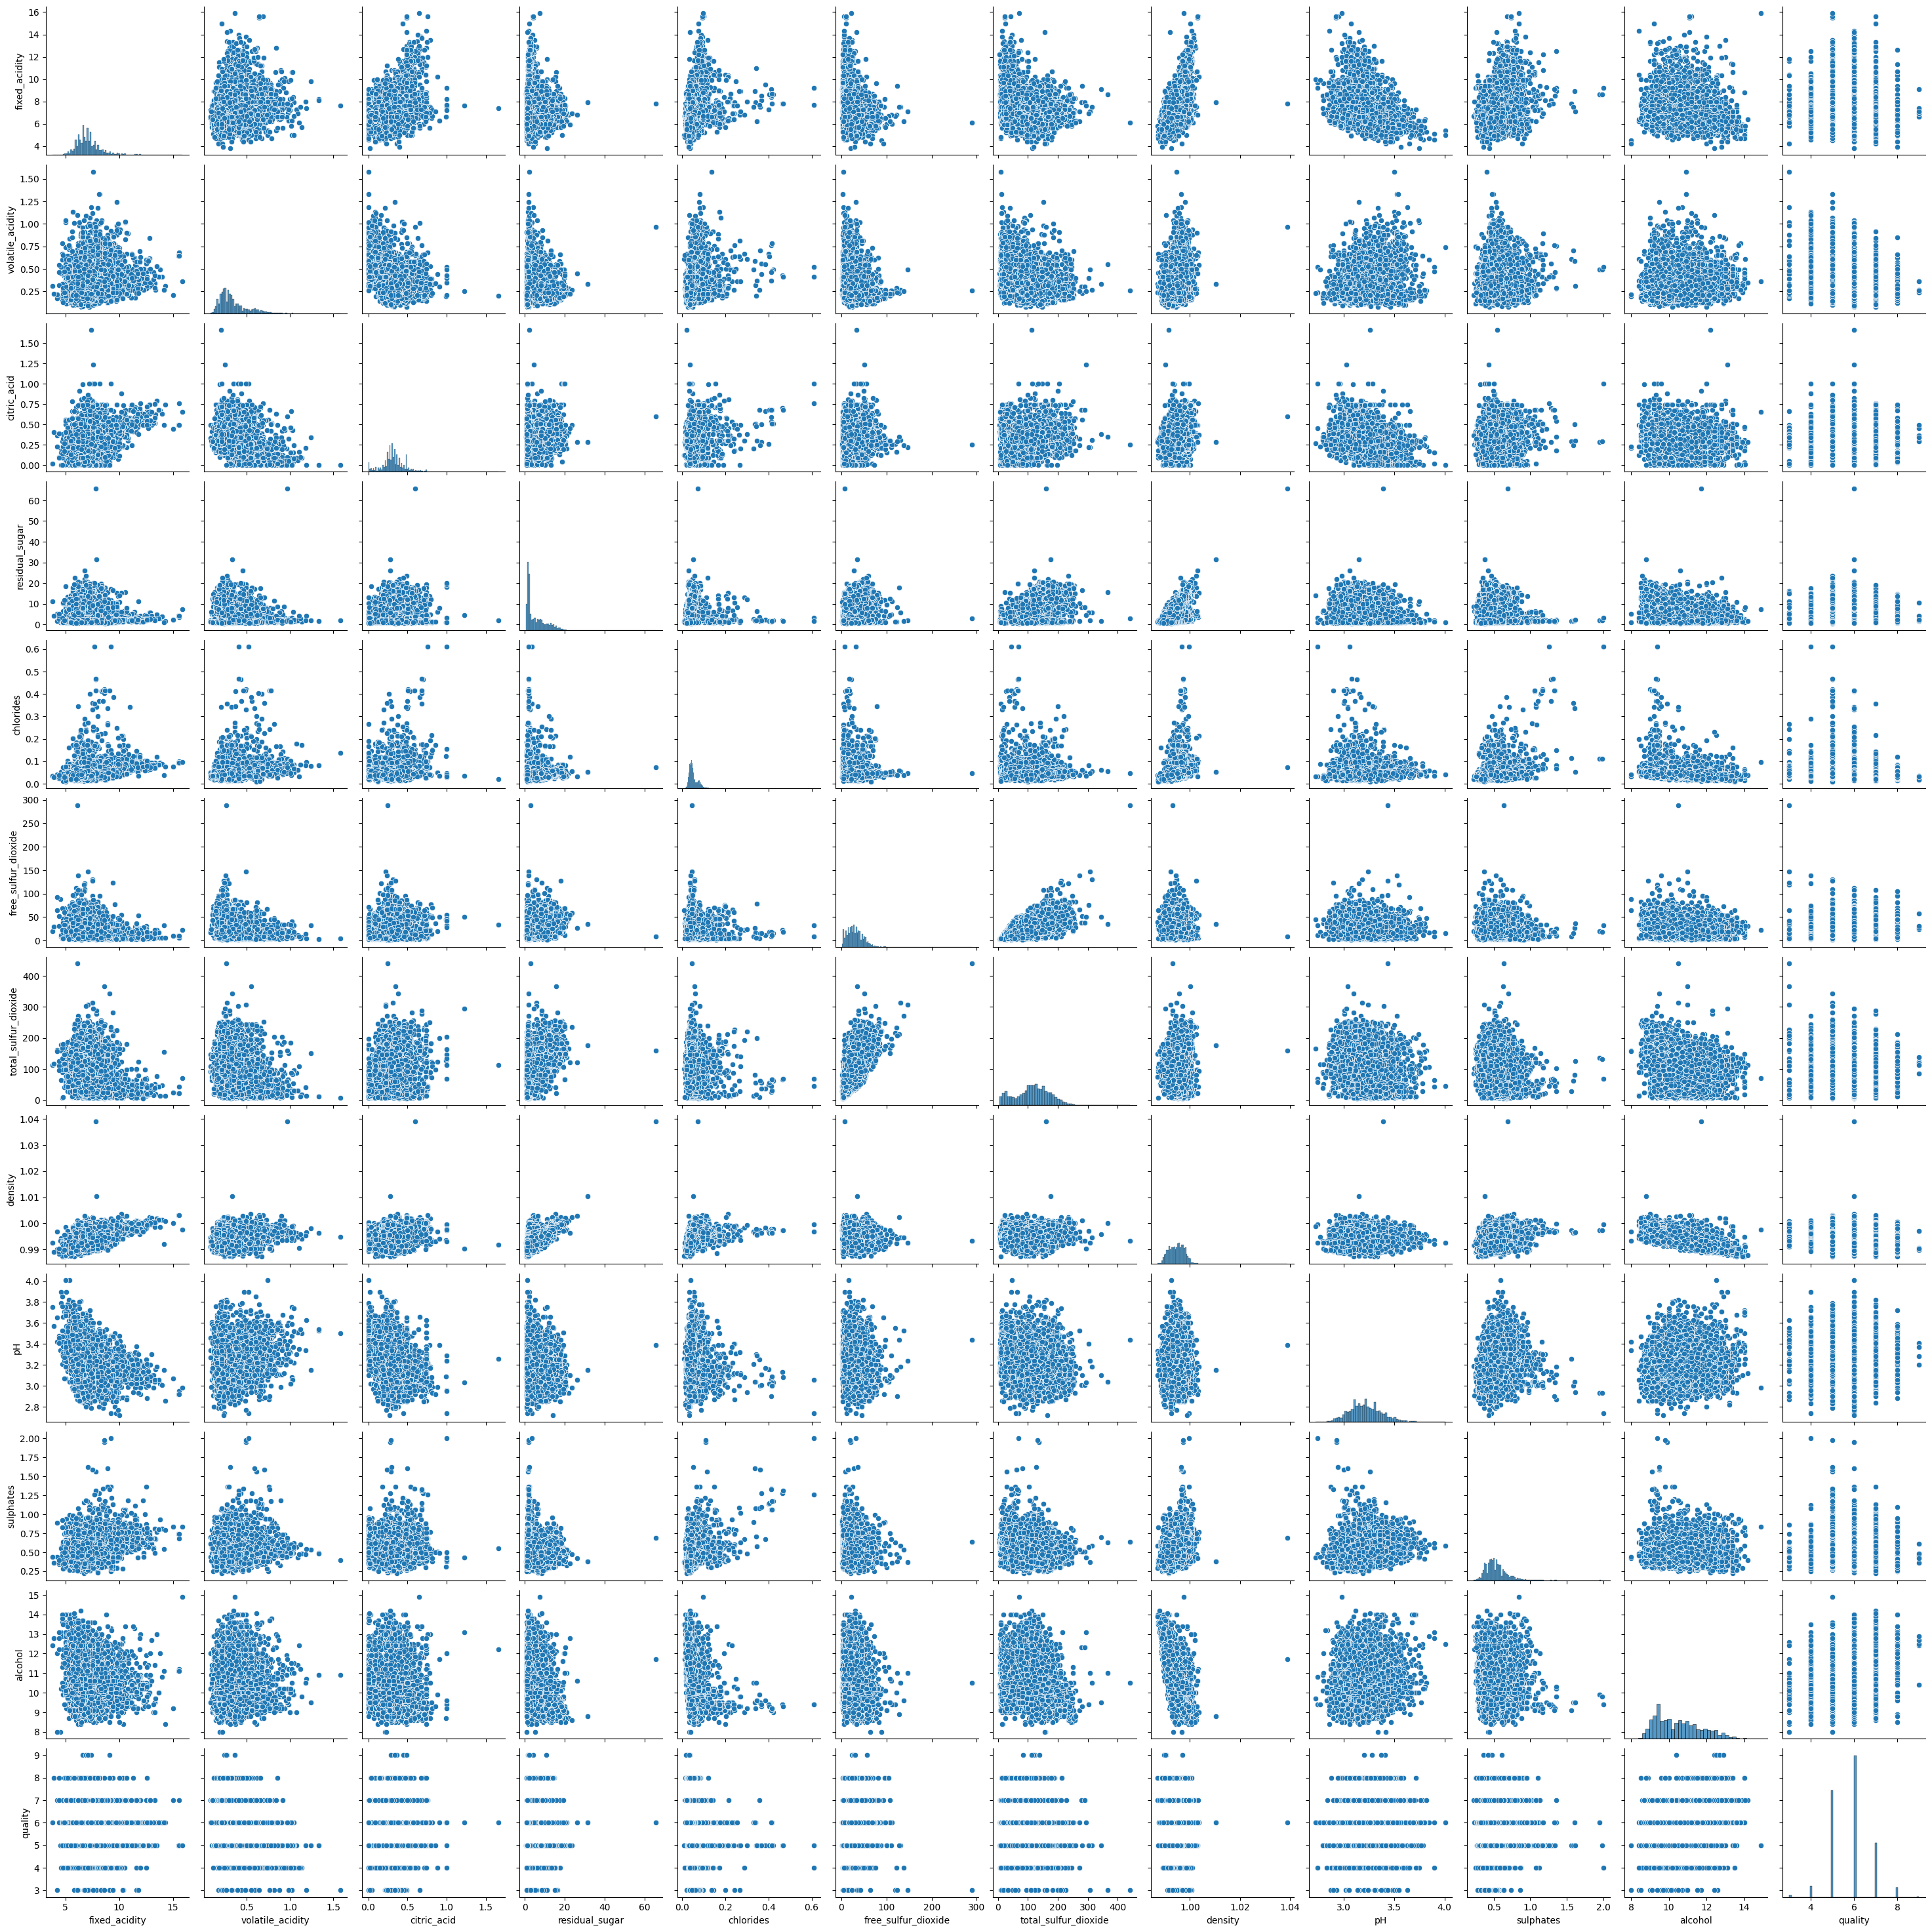

In [ ]:
sb.pairplot(df)

## Classification types of wine (red or white)

In [ ]:
# transforming label color using label binarizer
from sklearn.preprocessing import LabelBinarizer
lb =LabelBinarizer()
df['color'] = lb.fit_transform(df['color'])

In [ ]:
df['color']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: color, Length: 6497, dtype: int64

In [ ]:
# setting x and y and splitting data
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits =1 ,test_size =0.3 , random_state =42 )


In [ ]:
X = df.drop(columns =['color'])
y = df['color']

In [ ]:
train_idx , test_idx = next(sss.split(X,y))

In [ ]:
X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]
X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

In [ ]:
X_train.shape , X_test.shape

((4547, 12), (1950, 12))

In [ ]:
# stratified shuffle split gives equal 1,0 classifications on both train and test splits
y_train.value_counts(normalize = True) , y_test.value_counts(normalize = True)

(1    0.753904
 0    0.246096
 Name: color, dtype: float64,
 1    0.753846
 0    0.246154
 Name: color, dtype: float64)

- Decision tress require minimal feature preprocessing so we can fit the model directly now

- One hyperparameter that should be tuned is max depth

- Another Hyperparameter to be tuned is max features

- GridsearchCv is used for cross validation


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV ,StratifiedKFold
# stratified folding for
kf = StratifiedKFold(n_splits =3 )

In [ ]:
import sklearn.tree

In [ ]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [ ]:
dt = DecisionTreeClassifier()

grid = {'max_depth': range(1,30 ,2)}    # dict
g = GridSearchCV(estimator = dt ,
                 param_grid = grid ,
                 scoring = 'accuracy',
                 cv =kf,
                 n_jobs =-1) # parallelize code as much as possible

In [ ]:
g.fit(X_train , y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 30, 2)}, scoring='accuracy')

In [ ]:
type(g.best_estimator_)

sklearn.tree._classes.DecisionTreeClassifier

In [ ]:
g.best_estimator_.feature_importances_

array([0.00108034, 0.05071934, 0.        , 0.00483853, 0.20291317,
       0.00150707, 0.70313904, 0.01233169, 0.0066575 , 0.01324576,
       0.00356755, 0.        ])

In [ ]:
g.best_estimator_.max_features_

12

In [ ]:
g.best_estimator_.tree_.

SyntaxError: ignored

# plotting decision tree

In [ ]:
! pip install graphviz

In [ ]:
from io import StringIO
dot_data = StringIO()
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
export_graphviz(g.best_estimator_ , out_file= dot_data , filled =True)

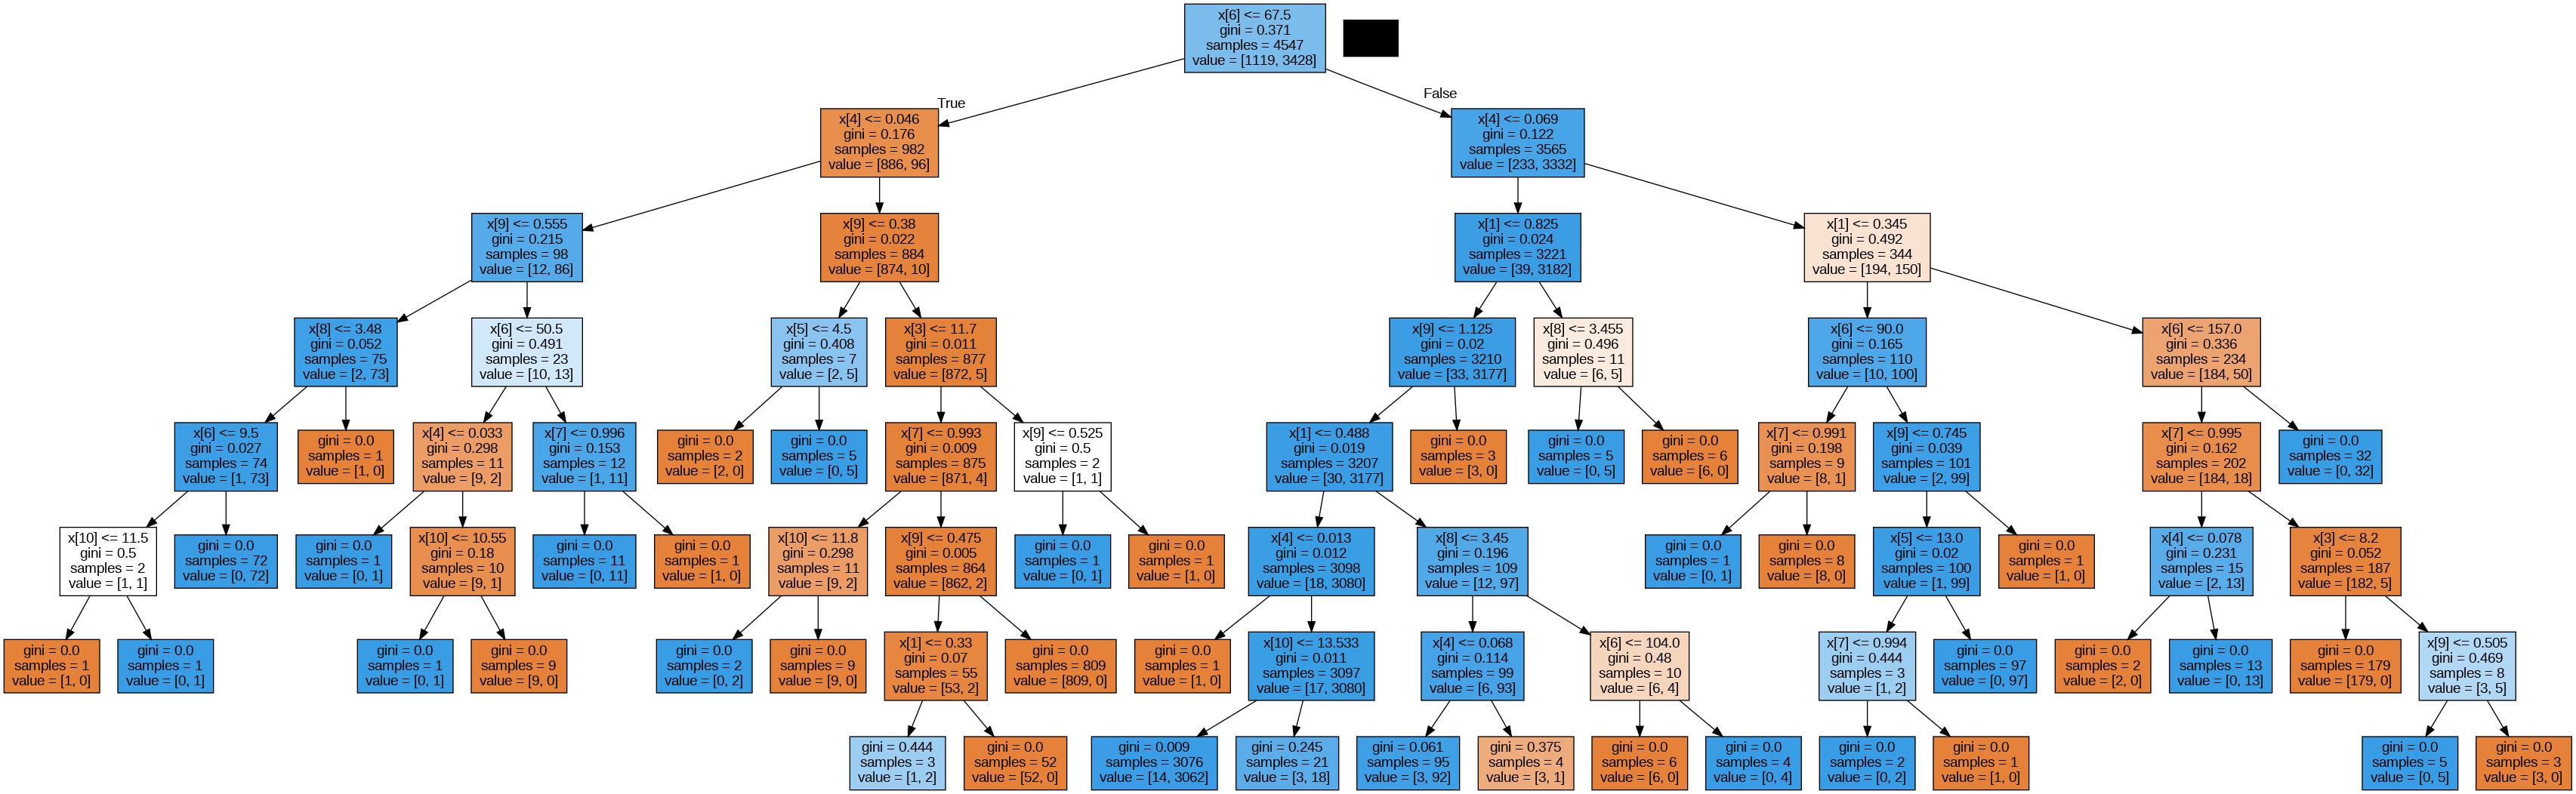

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename = filename)

## Building Regression tree to predict sugar

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Wine_Quality_Data.csv')

In [ ]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [ ]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Does the color feature affect the residual sugar variable?

We can check the relation between the quantitative variable and categorical variable using **ANOVA** test or simply by plotting a **boxplot**

<Axes: xlabel='color', ylabel='residual_sugar'>

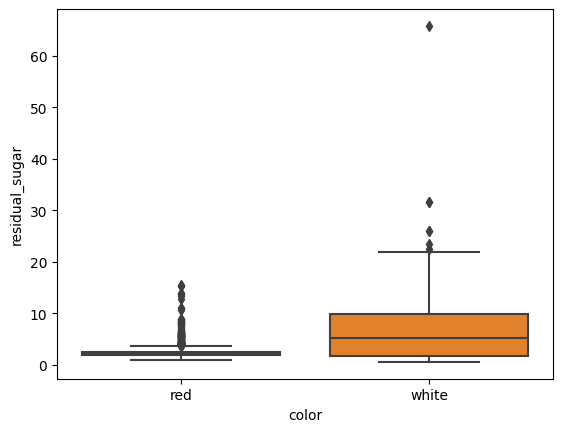

In [ ]:
sb.boxplot(df , x='color' , y='residual_sugar')

<Axes: xlabel='residual_sugar', ylabel='Count'>

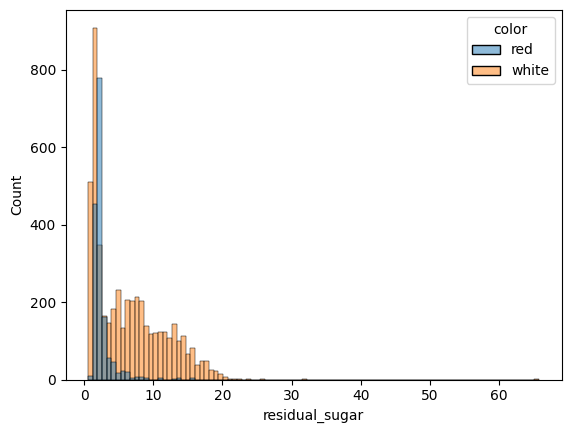

In [ ]:
sb.histplot(df , x= df['residual_sugar'] ,hue = 'color')

It seeems that the residual sugar for white wine is higher than red wine. So we will keep this variable but we should convert it

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder(drop='first')
t = ohc.fit_transform(df[['color']])

In [ ]:
df_temp = pd.DataFrame(t.toarray(),columns = ['color_encoded'])

In [ ]:
df = pd.concat([df,df_temp] ,axis =1)

In [ ]:
df.drop(columns = ['color'] ,inplace =True)
X = df.drop(columns = 'residual_sugar')
y = df['residual_sugar']

In [ ]:
# split data
from sklearn.model_selection import train_test_split , KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
kf = KFold(n_splits = 3) # kfold for cross validation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state =42)
# cross validation using gridsearchcv
from sklearn.model_selection import GridSearchCV
grid= {'max_depth': range(1,30,2)}
g= GridSearchCV(estimator = DTR , param_grid = grid ,cv=kf , scoring ='r2' , n_jobs = -1  )

In [ ]:
g.fit(X_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 30, 2)}, scoring='r2')

In [ ]:
g.best_score_

0.8469496266424498

In [ ]:
g.best_estimator_

DecisionTreeRegressor(max_depth=11, random_state=42)

In [ ]:
y_pred = g.predict(X_test)

In [ ]:
predictions = pd.DataFrame({'y_pred': y_pred,
              'y_test': y_test
})

<Axes: xlabel='y_pred', ylabel='y_test'>

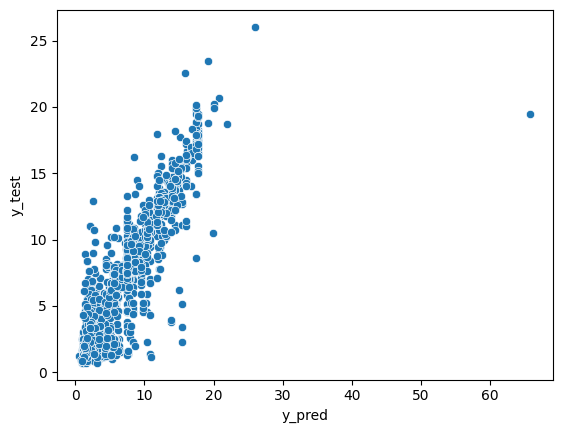

In [ ]:
sb.scatterplot(data = predictions , x= 'y_pred' , y='y_test')